In [1]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import imread
import scipy
from skimage.transform import resize
from PIL import Image
from scipy import ndimage
from dnn_app_utils import *
from sklearn.model_selection import train_test_split

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2


In [2]:
x, y = load_data()

C:\Users\ferna\Documents\Insper\IC\measuringMacroNutrients\first_iteration\dnn_app_utils.py:98: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  pizza_imgs = np.array(data) #cria uma matriz com todos os train_examples
C:\Users\ferna\Documents\Insper\IC\measuringMacroNutrients\first_iteration\dnn_app_utils.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  non_pizza = np.array(non_data)


In [3]:
train_x, test_x, train_y, test_y =  train_test_split(x, y, test_size=0.33, random_state=84)

In [4]:
train_x_orig = np.array(train_x)
test_x_orig = np.array(test_x)
train_y = np.array([train_y])
test_y = np.array([test_y])

In [5]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 1003
Number of testing examples: 495
Each image is of size: (64, 64, 3)
train_x_orig shape: (1003, 64, 64, 3)
train_y shape: (1, 1003)
test_x_orig shape: (495, 64, 64, 3)
test_y shape: (1, 495)


In [6]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

train_x = train_x_flatten
test_x = test_x_flatten

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 1003)
test_x's shape: (12288, 495)


In [7]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization. (≈ 1 line of code)
    ### START CODE HERE ###
    parameters = initialize_parameters_deep(layers_dims)
    ### END CODE HERE ###
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        ### START CODE HERE ### (≈ 1 line of code)
        AL, caches = L_model_forward(X, parameters)
        ### END CODE HERE ###
        
        # Compute cost.
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(AL, Y)
        ### END CODE HERE ###
    
        # Backward propagation.
        ### START CODE HERE ### (≈ 1 line of code)
        grads = L_model_backward(AL, Y, caches)
        ### END CODE HERE ###
 
        # Update parameters.
        ### START CODE HERE ### (≈ 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.grid(True)
    plt.show()
    
    return parameters

In [8]:
layers_dims = [12288, 20, 7, 5, 1] #  4-layer model

Cost after iteration 0: 0.651503
Cost after iteration 100: 0.535098
Cost after iteration 200: 0.513948
Cost after iteration 300: 0.500225
Cost after iteration 400: 0.468807
Cost after iteration 500: 0.475759
Cost after iteration 600: 0.440717
Cost after iteration 700: 0.447788
Cost after iteration 800: 0.417207
Cost after iteration 900: 0.409059
Cost after iteration 1000: 0.391302
Cost after iteration 1100: 0.383965
Cost after iteration 1200: 0.372399
Cost after iteration 1300: 0.341787
Cost after iteration 1400: 0.434166
Cost after iteration 1500: 0.326809
Cost after iteration 1600: 0.317641
Cost after iteration 1700: 0.439152
Cost after iteration 1800: 0.251573
Cost after iteration 1900: 0.291764
Cost after iteration 2000: 0.338029
Cost after iteration 2100: 0.319785
Cost after iteration 2200: 0.241568
Cost after iteration 2300: 0.631899
Cost after iteration 2400: 0.159300
Cost after iteration 2500: 0.154066
Cost after iteration 2600: 0.139760
Cost after iteration 2700: 0.168473
Cost

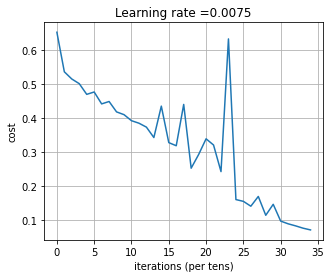

In [9]:
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 3500, print_cost = True)

In [ ]:
pred_train = predict(train_x, train_y, parameters)

In [ ]:
pred_test = predict(test_x, test_y, parameters)

In [ ]:
analysis = false_and_positives_analysis(pred_test, test_y)

In [ ]:
my_image_loads = "pizza_img.jpg" # change this to the name of your image file 
my_label_y = [0] # the true class of your image (1 -> pizza, 0 -> non-pizza)

In [ ]:
img = mpimg.imread(my_image_loads)
plt.imshow(img)
plt.show()

In [ ]:
fname = my_image_loads
image = np.array(imread(fname))
my_image = resize(image, (num_px,num_px)).reshape((num_px*num_px*3,1))
my_predicted_image = predict(my_image, my_label_y, parameters)

plt.imshow(image)
plt.show()